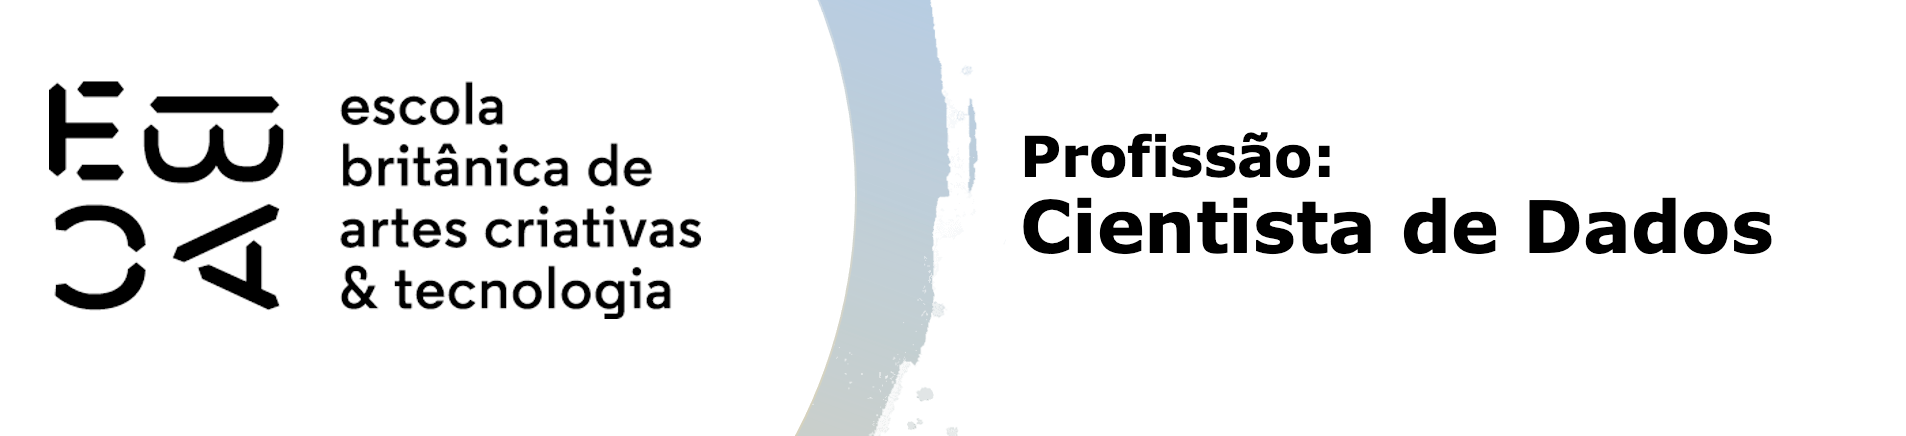

# Rodrigo Schulz
## Regressão III

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [76]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [77]:
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [78]:
df['tempo_emprego'].mean()

7.746164800507006

In [80]:
# Calculando as médias das colunas numéricas
means_tempo_emprego = df['tempo_emprego'].mean()

# Substituindo os valores ausentes pelas médias das colunas
df = df.fillna(means_tempo_emprego)

df.isna().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [81]:
# Convertendo o índice para o tipo datetime, se necessário
df.index = pd.to_datetime(df.index)

# Ordenando o DataFrame pelo índice (data_ref)
df = df.sort_index()

# Obtendo o índice máximo do DataFrame
indice_max = df.index.max()

# Calculando o índice de início do período de teste (3 meses antes do índice máximo)
indice_inicio_teste = indice_max - pd.DateOffset(months=3)

# Filtrando o DataFrame para obter a base de treinamento (anteriores aos 3 últimos meses)
base_treinamento = df[df.index < indice_inicio_teste]

# Filtrando o DataFrame para obter a base de teste (os 3 últimos meses)
base_teste = df[df.index >= indice_inicio_teste]

# Exibindo as bases de treinamento e teste
print("Base de Treinamento:")
print(base_treinamento)

print("\nBase de Teste:")
print(base_teste)

Base de Treinamento:
            index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
data_ref                                                              
2015-01-01   5762    M                S               N           0   
2015-01-01   1279    M                S               N           0   
2015-01-01  14111    M                S               N           0   
2015-01-01   8189    M                N               S           2   
2015-01-01   1830    F                N               S           2   
...           ...  ...              ...             ...         ...   
2015-11-01   2386    M                S               S           2   
2015-11-01  16237    F                N               S           0   
2015-11-01     85    M                S               S           0   
2015-11-01  10915    F                S               N           0   
2015-11-01  10690    F                N               S           0   

             tipo_renda             educacao estado_civ

Text(0.5, 1.0, 'tempo_emprego vs renda')

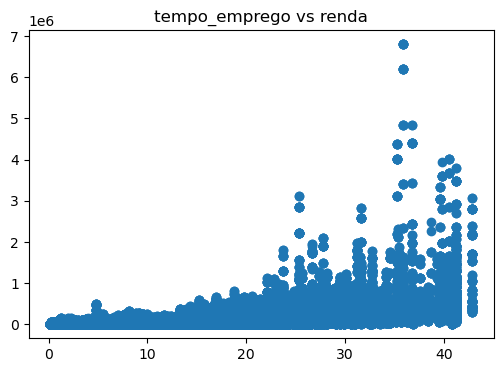

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.scatter(x=df['tempo_emprego'], y=df['renda'], label='tempo_emprego')
ax.set_title('tempo_emprego vs renda')

In [99]:
y = df['renda']
X1 = df['tempo_emprego']

# res = sm.OLS(y, x).fit()
res = smf.ols('y ~ X1',data=df).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                 2.000e+05
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:35:03   Log-Likelihood:            -9.5346e+06
No. Observations:              750000   AIC:                         1.907e+07
Df Residuals:                  749998   BIC:                         1.907e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.871e+04    149.943   -191.469      0.000    -2.9e+04   -2.84e+04
X1          6801.6740     15.210    447.198      0.000    6771.864    6831.484
==============================================================================
Omnibus:                  1836328.780   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      48290678605.640
Skew:                          25.821   Prob(JB):                         0.00
Kurtosis:                    1245.029   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [83]:
# Aplicando one-hot encoding (get dummies) às colunas categóricas
base_treinamento_encoded = pd.get_dummies(base_treinamento, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])
base_teste_encoded = pd.get_dummies(base_teste, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

# Removendo a coluna 'renda' das bases de treinamento e teste
X_train = base_treinamento_encoded.drop(['renda'], axis=1)
X_test = base_teste_encoded.drop(['renda'], axis=1)

# Definindo as variáveis alvo
y_train = base_treinamento_encoded['renda']
y_test = base_teste_encoded['renda']

# Criando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Calculando o R² ajustado
n = X_test.shape[0]  # número de observações no conjunto de teste
p = X_test.shape[1]  # número de features
r2_adj = 1 - (1 - r2_score(y_test, y_pred)) * (n - 1) / (n - p - 1)

# Exibindo o R² ajustado
print("R² Ajustado:", r2_adj)


R² Ajustado: -1.9438628448213988


### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [85]:
df['tempo_emprego']

data_ref
2015-01-01    16.717808
2015-01-01     9.600000
2015-01-01     8.208219
2015-01-01     1.301370
2015-01-01     1.254795
                ...    
2016-03-01     8.665753
2016-03-01     7.746165
2016-03-01    10.969863
2016-03-01     8.219178
2016-03-01     7.746165
Name: tempo_emprego, Length: 750000, dtype: float64

    Média Tempo de Emprego  Média Log-Renda  Quantidade de Observações
0                 0.515096         8.134693                      37699
1                 1.124770         8.215925                      37522
2                 1.783247         8.335011                      37437
3                 2.513020         8.390223                      37391
4                 3.300942         8.522387                      37915
5                 3.989239         8.612289                      37253
6                 4.613535         8.673718                      37401
7                 5.367816         8.809638                      37545
8                 6.205161         8.905467                      37495
9                 7.010453         8.986450                      37379
10                7.734515         8.815827                     136607
11                7.931331         9.124771                      13542
12                8.578116         9.191291                      37584
13    

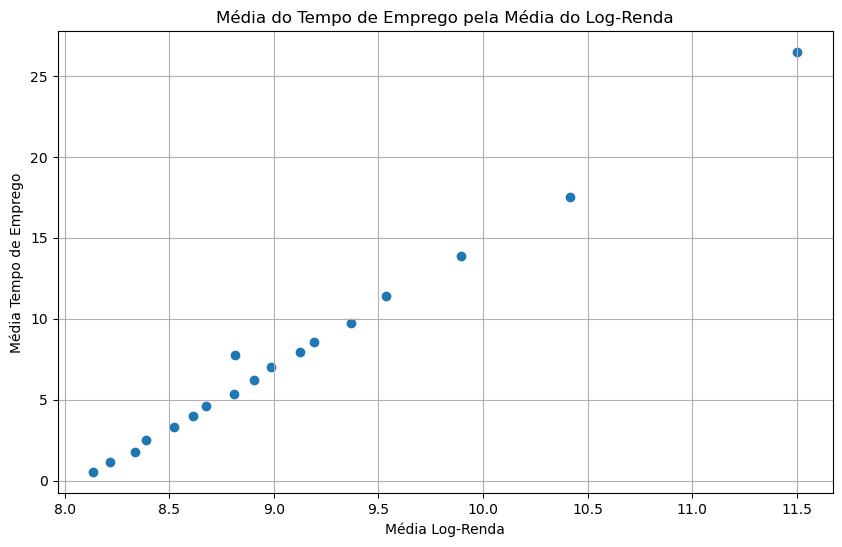

In [88]:
# Categorizando a variável 'tempo_emprego' em 20 quantis
df['tempo_emprego_quantile'] = pd.qcut(df['tempo_emprego'], q=20, duplicates='drop')

# Criando um DataFrame para a tabela de perfil
perfil_df = df.groupby('tempo_emprego_quantile').agg({
    'tempo_emprego': 'mean',
    'renda': lambda x: np.mean(np.log(x)),
    'tempo_emprego_quantile': 'size'
}).rename(columns={
    'tempo_emprego': 'Média Tempo de Emprego',
    'renda': 'Média Log-Renda',
    'tempo_emprego_quantile': 'Quantidade de Observações'
})

# Resetando o índice do DataFrame
perfil_df.reset_index(drop=True, inplace=True)

# Exibindo a tabela de perfil
print(perfil_df)

# Criando o gráfico da média do tempo de emprego pela média do log-renda
plt.figure(figsize=(10, 6))
plt.scatter(perfil_df['Média Log-Renda'], perfil_df['Média Tempo de Emprego'])
plt.xlabel('Média Log-Renda')
plt.ylabel('Média Tempo de Emprego')
plt.title('Média do Tempo de Emprego pela Média do Log-Renda')
plt.grid(True)
plt.show()


### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [105]:
from sklearn.preprocessing import PolynomialFeatures

# Criando features polinomiais a partir da variável 'tempo_emprego'
degree = 2  # Grau do polinômio
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train[['tempo_emprego']])
X_test_poly = poly.transform(X_test[['tempo_emprego']])

# Criando o modelo de regressão linear com features polinomiais
model_poly = LinearRegression()

# Treinando o modelo
model_poly.fit(X_train_poly, y_train)

# Fazendo previsões com o conjunto de teste
y_pred_poly = model_poly.predict(X_test_poly)

# Calculando o R² ajustado
r2_adj_poly = 1 - (1 - r2_score(y_test, y_pred_poly)) * (len(y_test) - 1) / (len(y_test) - degree - 1)

# Exibindo o R² ajustado
print("R² Ajustado com Polynomial Features:", r2_adj_poly)


R² Ajustado com Polynomial Features: -2.608695823219998


### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [104]:
# Avaliando o modelo com Polynomial Features na base de testes
y_pred_poly = model_poly.predict(X_test_poly)
r2_adj_poly = 1 - (1 - r2_score(y_test, y_pred_poly)) * (len(y_test) - 1) / (len(y_test) - degree - 1)

print("R² Ajustado com Polynomial Features (Teste):", r2_adj_poly)

R² Ajustado com Polynomial Features (Teste): -2.608695823219998
